In [1]:
import pandas as pd

In [2]:
unique = pd.read_csv("data/unique_companies.csv", delimiter=";")
price = pd.read_csv("data/us-shareprices-daily.csv", delimiter=";")
companies = pd.read_csv("data/us-companies.csv", delimiter=";")

price

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
0,A,45846,2019-03-29,80.16,80.67,79.95,80.38,77.04,1585137,NaN,317515869.0
1,A,45846,2019-04-01,80.96,81.77,80.96,81.56,78.33,1522681,0.16,317515869.0
2,A,45846,2019-04-02,81.71,81.76,81.03,81.14,77.93,1203037,NaN,317515869.0
3,A,45846,2019-04-03,81.54,82.02,81.46,81.94,78.70,2141025,NaN,317515869.0
4,A,45846,2019-04-04,81.84,82.05,80.44,80.83,77.63,2180112,NaN,317515869.0
...,...,...,...,...,...,...,...,...,...,...,...
5768308,ZYXI,171401,2024-02-26,13.04,13.04,12.67,12.82,12.82,335055,NaN,36435000.0
5768309,ZYXI,171401,2024-02-27,12.83,13.77,12.83,13.74,13.74,395525,NaN,36435000.0
5768310,ZYXI,171401,2024-02-28,13.63,13.70,13.38,13.49,13.49,290887,NaN,32170182.0
5768311,ZYXI,171401,2024-02-29,13.51,13.57,13.28,13.56,13.56,232534,NaN,32170182.0


In [3]:
companies

,Ticker,SimFinId,Company Name,IndustryId,ISIN,End of financial year (month),Number Employees,Business Summary,Market,CIK,Main Currency
0,NaN,17162642,NaN,NaN,NaN,NaN,NaN,NaN,us,1913577.0,USD
1,NaN,17429327,NaN,NaN,NaN,NaN,NaN,NaN,us,1894951.0,USD
2,NaN,17590527,NaN,NaN,NaN,NaN,NaN,NaN,us,1847355.0,USD
3,NaN,17590533,NaN,NaN,NaN,NaN,NaN,NaN,us,1856161.0,USD
4,NaN,17596599,NaN,NaN,NaN,NaN,NaN,NaN,us,1862463.0,USD
...,...,...,...,...,...,...,...,...,...,...,...
6062,ZWS,17663788,Zurn Elkay Water Solutions Corporation,100001.0,US98983L1089,12.0,2700.0,Zurn Elkay Water Solutions Corporation designs...,us,1439288.0,USD
6063,ZY,1243193,Zymergen Inc.,106002.0,US98985X1000,12.0,758.0,Zymergen is a biofacturing company using biolo...,us,1645842.0,USD
6064,ZYME,17663790,Zymeworks Inc.,106002.0,CA98985W1023,12.0,291.0,"Zymeworks Inc., a clinical-stage biopharmaceut...",us,1403752.0,USD
6065,ZYNE,901704,"Zynerba Pharmaceuticals, Inc.",106002.0,US98986X1090,12.0,25.0,Zynerba Pharmaceuticals Inc together with its ...,us,1621443.0,USD


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = price.pivot(index="Date", columns="Ticker", values="Close")

pivot_df.index = pd.to_datetime(pivot_df.index)
correlation_matrix = pivot_df.corr()

aapl_correlation = correlation_matrix['AAPL'].sort_values(ascending=False)

aapl_correlation = aapl_correlation[aapl_correlation < 1]

top_5_aapl_correlated = aapl_correlation.head(10)

print("Top 5 most correlated tickers with AAPL:")
print(top_5_aapl_correlated)



Top 5 most correlated tickers with AAPL:
Ticker
NUAN 0.959182
MSFT 0.955206
ARRS 0.953846
FAST 0.948998
ODFL 0.947978


In [5]:
tickers_df = price[price["Ticker"].isin(["AAPL", "MSFT", "BRO", "FAST", "ODFL"])]
tickers_df

,Ticker,SimFinId,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend,Shares Outstanding
14263,AAPL,111052,2019-03-29,47.46,47.52,47.13,47.49,45.50,94255844,NaN,1.886112e+10
14264,AAPL,111052,2019-04-01,47.91,47.92,47.09,47.81,45.81,111447856,NaN,1.842914e+10
14265,AAPL,111052,2019-04-02,47.77,48.62,47.76,48.51,46.47,91062928,NaN,1.842914e+10
14266,AAPL,111052,2019-04-03,48.31,49.12,48.29,48.84,46.79,93087320,NaN,1.842914e+10
14267,AAPL,111052,2019-04-04,48.70,49.09,48.28,48.92,46.87,76457100,NaN,1.842914e+10
...,...,...,...,...,...,...,...,...,...,...,...
3762242,ODFL,782146,2024-02-26,219.32,223.65,219.01,222.94,221.78,1776598,NaN,2.176743e+08
3762243,ODFL,782146,2024-02-27,222.50,223.43,218.38,220.53,219.38,1787370,NaN,2.176743e+08
3762244,ODFL,782146,2024-02-28,217.72,219.26,215.79,216.45,215.32,1036986,NaN,2.176743e+08
3762245,ODFL,782146,2024-02-29,218.69,221.96,217.07,221.24,220.08,1938482,NaN,2.176743e+08


In [6]:
pivot_df = tickers_df.pivot(index="Date", columns="Ticker", values="Close")

pivot_df.index = pd.to_datetime(pivot_df.index)

correlation_matrix = pivot_df.corr()

In [13]:
tickers_df['Close']

14263       47.49
14264       47.81
14265       48.51
14266       48.84
14267       48.92
            ...  
3762242    222.94
3762243    220.53
3762244    216.45
3762245    221.24
3762246    222.14
Name: Close, Length: 6200, dtype: float64

# Correlation matrix of our chosen stocks. Highly correlated so we can use it as predictors


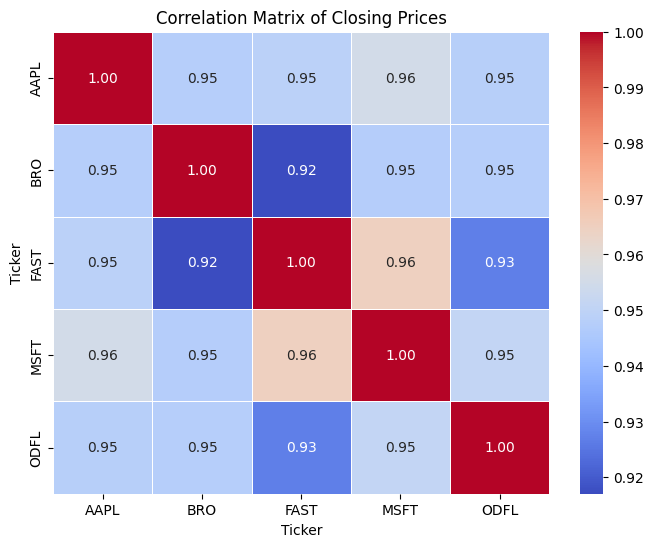

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Closing Prices")
plt.show()

In [9]:
tickers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6200 entries, 14263 to 3762246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              6200 non-null   object 
 1   SimFinId            6200 non-null   int64  
 2   Date                6200 non-null   object 
 3   Open                6200 non-null   float64
 4   High                6200 non-null   float64
 5   Low                 6200 non-null   float64
 6   Close               6200 non-null   float64
 7   Adj. Close          6200 non-null   float64
 8   Volume              6200 non-null   int64  
 9   Dividend            101 non-null    float64
 10  Shares Outstanding  6200 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 581.2+ KB


In [10]:
## too many NaNs

tickers_df.drop(columns=['Dividend','SimFinId'], inplace=True)

/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_87346/951265432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickers_df.drop(columns=['Dividend','SimFinId'], inplace=True)


In [11]:
df2=pd.read_csv('price2.csv')
df2

,Date,Shares Outstanding,Close,Adj. Close,High,Low,Open,Volume,Ticker
0,2024-03-04,15441881000,175.10,174.28,176.90,173.79,176.15,81510101,AAPL
1,2024-03-05,15441881000,170.12,169.32,172.04,169.62,170.76,95132355,AAPL
2,2024-03-06,15441881000,169.12,168.32,171.24,168.68,171.06,68587707,AAPL
3,2024-03-07,15441881000,169.00,168.21,170.73,168.49,169.15,71765061,AAPL
4,2024-03-08,15441881000,170.73,169.93,173.70,168.94,169.00,76267041,AAPL
...,...,...,...,...,...,...,...,...,...
1265,2025-03-03,212545079,172.28,172.01,178.77,171.44,178.18,2410402,ODFL
1266,2025-03-04,212545079,175.00,174.72,177.30,165.82,170.64,3026075,ODFL
1267,2025-03-05,212545079,176.52,176.52,176.86,171.69,175.42,2213690,ODFL
1268,2025-03-06,212545079,177.58,177.58,178.71,173.55,175.94,2007357,ODFL


## Have more data for training


In [382]:
combined_df = pd.concat([tickers_df, df2], ignore_index=True)

# Optionally, you can sort the resulting dataframe by Ticker and Date
combined_df = combined_df.sort_values(by=["Ticker", "Date"])

combined_df

,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Shares Outstanding
0,AAPL,2019-03-29,47.46,47.52,47.13,47.49,45.50,94255844,1.886112e+10
1,AAPL,2019-04-01,47.91,47.92,47.09,47.81,45.81,111447856,1.842914e+10
2,AAPL,2019-04-02,47.77,48.62,47.76,48.51,46.47,91062928,1.842914e+10
3,AAPL,2019-04-03,48.31,49.12,48.29,48.84,46.79,93087320,1.842914e+10
4,AAPL,2019-04-04,48.70,49.09,48.28,48.92,46.87,76457100,1.842914e+10
...,...,...,...,...,...,...,...,...,...
7465,ODFL,2025-03-03,178.18,178.77,171.44,172.28,172.01,2410402,2.125451e+08
7466,ODFL,2025-03-04,170.64,177.30,165.82,175.00,174.72,3026075,2.125451e+08
7467,ODFL,2025-03-05,175.42,176.86,171.69,176.52,176.52,2213690,2.125451e+08
7468,ODFL,2025-03-06,175.94,178.71,173.55,177.58,177.58,2007357,2.125451e+08


# Keep last 30 days for out of sample testing


In [423]:

df_cleaned = combined_df.groupby('Ticker').apply(lambda x: x.iloc[:-30]).reset_index(drop=True)
df_cleaned

/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_87346/4021081148.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = combined_df.groupby('Ticker').apply(lambda x: x.iloc[:-30]).reset_index(drop=True)


,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Shares Outstanding
0,AAPL,2019-03-29,47.46,47.52,47.13,47.49,45.50,94255844,1.886112e+10
1,AAPL,2019-04-01,47.91,47.92,47.09,47.81,45.81,111447856,1.842914e+10
2,AAPL,2019-04-02,47.77,48.62,47.76,48.51,46.47,91062928,1.842914e+10
3,AAPL,2019-04-03,48.31,49.12,48.29,48.84,46.79,93087320,1.842914e+10
4,AAPL,2019-04-04,48.70,49.09,48.28,48.92,46.87,76457100,1.842914e+10
...,...,...,...,...,...,...,...,...,...
7315,ODFL,2025-01-16,186.70,190.55,185.35,189.92,189.62,1083403,2.134975e+08
7316,ODFL,2025-01-17,191.26,191.26,186.46,189.55,189.25,1307512,2.134975e+08
7317,ODFL,2025-01-21,191.52,191.65,188.88,190.43,190.13,1440230,2.134975e+08
7318,ODFL,2025-01-22,190.20,191.40,188.64,188.79,188.49,1410214,2.134975e+08


## Create pivot dataframe


In [424]:
pivoted_df = df_cleaned.pivot(index="Date", columns="Ticker", values=["Open", "High", "Low", "Close", "Adj. Close", "Volume"])

# Flatten column names
pivoted_df.columns = [f"{col[0]}_{col[1]}" for col in pivoted_df.columns]
pivoted_df.reset_index(inplace=True)

# Merge with original dataset to ensure each ticker retains its own target variable
merged_df = df_cleaned.merge(pivoted_df, on="Date", how="left")

cols_to_drop = ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]
merged_df.drop(columns=cols_to_drop, inplace=True)

merged_df

,Ticker,Date,Shares Outstanding,Open_AAPL,Open_BRO,Open_FAST,Open_MSFT,Open_ODFL,High_AAPL,High_BRO,...,Adj. Close_AAPL,Adj. Close_BRO,Adj. Close_FAST,Adj. Close_MSFT,Adj. Close_ODFL,Volume_AAPL,Volume_BRO,Volume_FAST,Volume_MSFT,Volume_ODFL
0,AAPL,2019-03-29,1.886112e+10,47.46,29.61,32.00,118.07,48.70,47.52,29.66,...,45.50,28.25,27.49,111.40,47.01,94255844.0,825169.0,3728924.0,25399752.0,1380345.0
1,AAPL,2019-04-01,1.842914e+10,47.91,29.69,32.48,118.95,48.67,47.92,29.85,...,45.81,28.53,28.12,112.42,48.59,111447856.0,634293.0,4263924.0,22789103.0,1231452.0
2,AAPL,2019-04-02,1.842914e+10,47.77,29.78,32.89,119.06,49.70,48.62,29.83,...,46.47,28.40,28.21,112.58,48.37,91062928.0,715326.0,3075988.0,18142297.0,1339395.0
3,AAPL,2019-04-03,1.842914e+10,48.31,29.81,33.09,119.86,49.78,49.12,29.81,...,46.79,28.48,28.13,113.32,48.81,93087320.0,807577.0,4054558.0,22860744.0,1673076.0
4,AAPL,2019-04-04,1.842914e+10,48.70,29.81,33.01,120.10,50.08,49.09,29.95,...,46.87,28.67,28.35,112.75,49.52,76457100.0,784800.0,2153372.0,20112848.0,1330086.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,ODFL,2025-01-16,2.134975e+08,237.35,104.10,74.30,428.69,186.70,238.01,106.01,...,228.01,105.80,74.33,423.73,189.62,71759052.0,1176426.0,3946863.0,15300023.0,1083403.0
7316,ODFL,2025-01-17,2.134975e+08,232.12,106.17,76.33,434.08,191.26,232.29,106.32,...,229.73,105.40,75.64,428.18,189.25,68488301.0,4131030.0,7836784.0,26197507.0,1307512.0
7317,ODFL,2025-01-21,2.134975e+08,224.00,106.00,76.22,430.20,191.52,224.42,106.74,...,222.40,105.54,75.65,427.65,190.13,98070429.0,1841209.0,4450525.0,26085703.0,1440230.0
7318,ODFL,2025-01-22,2.134975e+08,219.79,106.05,76.20,437.56,190.20,224.12,106.05,...,223.58,105.04,75.16,445.31,188.49,64126500.0,1262517.0,4457176.0,27803811.0,1410214.0


## Create target variable, 1 if price went up the next day and 0 otherwise


In [425]:
merged_df['Close_Ticker_Shifted'] = None  

# Process each ticker separately
for ticker in merged_df['Ticker'].unique():
    close_col = f"Close_{ticker}" 
    if close_col in merged_df.columns:
        shifted_values = merged_df.loc[merged_df['Ticker'] == ticker, close_col].shift(-1)
        
        # Assign to the new column
        merged_df.loc[merged_df['Ticker'] == ticker, 'Close_Ticker_Shifted'] = shifted_values
        merged_df.loc[merged_df['Ticker'] == ticker, 'Target'] = (
            merged_df.loc[merged_df['Ticker'] == ticker, 'Close_Ticker_Shifted'] > 
            merged_df.loc[merged_df['Ticker'] == ticker, close_col]
        ).astype(int)  


# Convert to numeric type
merged_df['Close_Ticker_Shifted'] = pd.to_numeric(merged_df['Close_Ticker_Shifted'])


## Random checks


In [298]:
BRO=merged_df[merged_df['Ticker']=='MSFT']
BRO[['Close_MSFT', 'Close_Ticker_Shifted','Shares Outstanding']]

,Close_MSFT,Close_Ticker_Shifted,Shares Outstanding
4362,117.94,119.02,7.672213e+09
4363,119.02,119.19,7.666000e+09
4364,119.19,119.97,7.666000e+09
4365,119.97,119.36,7.666000e+09
4366,119.36,119.89,7.666000e+09
...,...,...,...
5811,421.50,418.58,7.434881e+09
5812,418.58,423.35,7.434881e+09
5813,423.35,427.85,7.434881e+09
5814,427.85,422.37,7.434881e+09


In [426]:
merged_df[['Close_AAPL', 'Close_Ticker_Shifted']]

,Close_AAPL,Close_Ticker_Shifted
0,47.49,47.81
1,47.81,48.51
2,48.51,48.84
3,48.84,48.92
4,48.92,49.25
...,...,...
7315,228.26,189.55
7316,229.98,190.43
7317,222.64,188.79
7318,223.83,191.54


In [427]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                7320 non-null   object 
 1   Date                  7320 non-null   object 
 2   Shares Outstanding    7320 non-null   float64
 3   Open_AAPL             7320 non-null   float64
 4   Open_BRO              7320 non-null   float64
 5   Open_FAST             7320 non-null   float64
 6   Open_MSFT             7320 non-null   float64
 7   Open_ODFL             7320 non-null   float64
 8   High_AAPL             7320 non-null   float64
 9   High_BRO              7320 non-null   float64
 10  High_FAST             7320 non-null   float64
 11  High_MSFT             7320 non-null   float64
 12  High_ODFL             7320 non-null   float64
 13  Low_AAPL              7320 non-null   float64
 14  Low_BRO               7320 non-null   float64
 15  Low_FAST             

In [428]:
merged_df.Target.value_counts()

Target
1.0    3924
0.0    3396
Name: count, dtype: int64

params = {
"objective": "binary:logistic",
"eval_metric": "logloss",
"eta": 0.03, # Lower learning rate
"max_depth": 4, # Reduce complexity
"subsample": 0.7, # Reduce dependence on training data
"colsample_bytree": 0.7, # Reduce overfitting
"gamma": 5.0, # Require stronger splits
"alpha": 1.0, # More L1 regularization
"lambda": 5.0, # More L2 regularization
"scale_pos_weight": scale_pos_weight, # Balance classes
"random_state": 42
}


## final model: XGboost

- 61.87% accuracy on testing
- 67.79% accuracy on training


In [435]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Define features and target
features = merged_df.drop(columns=[ 'Date', 'Close_Ticker_Shifted', 'Target','Ticker'])
target = merged_df['Target']

# Compute class weight for imbalance handling
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(target), y=target)
scale_pos_weight = class_weights[1] / class_weights[0]  # Ratio of class weights

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Convert data into DMatrix format (for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train,)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.01,  # Lower learning rate
    "max_depth": 8,  # Reduce complexity
    "subsample": 0.9,  # Reduce dependence on training data
    "colsample_bytree": 0.8,  # Reduce overfitting
    "gamma": 5.0,  # Require stronger splits
    "alpha": 1.0,  # More L1 regularization
    "lambda": 7.0,  # More L2 regularization
   # "scale_pos_weight": scale_pos_weight,  # Balance classes
    "random_state": 42
}

# Train the model with early stopping
evallist = [(dtrain, "train"), (dtest, "eval")]
num_rounds = 500
model = xgb.train(params, dtrain, num_rounds, evals=evallist, early_stopping_rounds=20, verbose_eval=50)

# Predict on test data
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy Test: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


y_pred_t = model.predict(dtrain)
y_pred_t = (y_pred_t > 0.5).astype(int)

accuracy_train = accuracy_score(y_train, y_pred_t)

print(f"Model Accuracy Train: {accuracy_train:.4f}")


[0]	train-logloss:0.68976	eval-logloss:0.68998
[50]	train-logloss:0.66530	eval-logloss:0.67719
[100]	train-logloss:0.65253	eval-logloss:0.67085
[150]	train-logloss:0.64609	eval-logloss:0.66756
[200]	train-logloss:0.64222	eval-logloss:0.66591
[250]	train-logloss:0.64097	eval-logloss:0.66524
[264]	train-logloss:0.64093	eval-logloss:0.66528
Model Accuracy Test: 0.6189
              precision    recall  f1-score   support

         0.0       0.67      0.35      0.46       679
         1.0       0.60      0.85      0.71       785

    accuracy                           0.62      1464
   macro avg       0.64      0.60      0.58      1464
weighted avg       0.63      0.62      0.59      1464

Model Accuracy Train: 0.6779


## Save the model


In [444]:
import joblib

joblib.dump(model, 'xgb.joblib')
print("Model saved as 'xgb_regressor_model.joblib'")

Model saved as 'xgb_regressor_model.joblib'


In [305]:
combined_df=pd.read_csv('price2.csv')

combined_df

,Date,Shares Outstanding,Close,Adj. Close,High,Low,Open,Volume,Ticker
0,2024-03-05,15441881000,170.12,169.32,172.04,169.62,170.76,95132355,AAPL
1,2024-03-06,15441881000,169.12,168.32,171.24,168.68,171.06,68587707,AAPL
2,2024-03-07,15441881000,169.00,168.21,170.73,168.49,169.15,71765061,AAPL
3,2024-03-08,15441881000,170.73,169.93,173.70,168.94,169.00,76267041,AAPL
4,2024-03-11,15441881000,172.75,171.94,174.38,172.05,172.94,58929918,AAPL
...,...,...,...,...,...,...,...,...,...
1270,2025-03-05,212545079,176.52,176.52,176.86,171.69,175.42,2213690,ODFL
1271,2025-03-06,212545079,177.58,177.58,178.71,173.55,175.94,2007357,ODFL
1272,2025-03-07,212545079,179.55,179.55,181.47,176.64,177.58,2663564,ODFL
1273,2025-03-10,212545079,177.97,177.97,181.76,177.24,178.48,2012974,ODFL


## Last 30 days of data, unseen by model


In [437]:
df_last_30 = combined_df.groupby('Ticker').apply(lambda x: x.tail(30)).reset_index(drop=True)
df_last_30

/var/folders/6v/qvykl7vd2yb8gqx3qb10rc5m0000gn/T/ipykernel_87346/1442948884.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_last_30 = combined_df.groupby('Ticker').apply(lambda x: x.tail(30)).reset_index(drop=True)


,Ticker,Date,Open,High,Low,Close,Adj. Close,Volume,Shares Outstanding
0,AAPL,2025-01-24,224.78,225.63,221.41,222.78,222.54,54697907,1.502207e+10
1,AAPL,2025-01-27,224.02,232.15,223.98,229.86,229.61,94863418,1.502207e+10
2,AAPL,2025-01-28,230.85,240.19,230.81,238.26,238.00,75707569,1.502207e+10
3,AAPL,2025-01-29,234.12,239.85,234.01,239.36,239.10,45486100,1.502207e+10
4,AAPL,2025-01-30,238.66,240.79,237.21,237.59,237.33,55658279,1.502207e+10
...,...,...,...,...,...,...,...,...,...
145,ODFL,2025-03-03,178.18,178.77,171.44,172.28,172.01,2410402,2.125451e+08
146,ODFL,2025-03-04,170.64,177.30,165.82,175.00,174.72,3026075,2.125451e+08
147,ODFL,2025-03-05,175.42,176.86,171.69,176.52,176.52,2213690,2.125451e+08
148,ODFL,2025-03-06,175.94,178.71,173.55,177.58,177.58,2007357,2.125451e+08


## Same transformations as for the model


In [438]:
pivoted_df = df_last_30.pivot(index="Date", columns="Ticker", values=["Open", "High", "Low", "Close", "Adj. Close", "Volume"])

# Flatten column names
pivoted_df.columns = [f"{col[0]}_{col[1]}" for col in pivoted_df.columns]
pivoted_df.reset_index(inplace=True)

# Merge with original dataset to ensure each ticker retains its own target variable
df = df_last_30.merge(pivoted_df, on="Date", how="left")

cols_to_drop = ["Open", "High", "Low", "Close", "Adj. Close", "Volume"]
df.drop(columns=cols_to_drop, inplace=True)

df['Close_Ticker_Shifted'] = None  

# Process each ticker separately
for ticker in df['Ticker'].unique():
    close_col = f"Close_{ticker}" 
    if close_col in df.columns:
        shifted_values = df.loc[df['Ticker'] == ticker, close_col].shift(-1)
        
        # Assign to the new column
        df.loc[df['Ticker'] == ticker, 'Close_Ticker_Shifted'] = shifted_values
        df.loc[df['Ticker'] == ticker, 'Target'] = (
            df.loc[df['Ticker'] == ticker, 'Close_Ticker_Shifted'] > 
            df.loc[df['Ticker'] == ticker, close_col]
        ).astype(int)  


# Convert to numeric type
df['Close_Ticker_Shifted'] = pd.to_numeric(df['Close_Ticker_Shifted'])

df

,Ticker,Date,Shares Outstanding,Open_AAPL,Open_BRO,Open_FAST,Open_MSFT,Open_ODFL,High_AAPL,High_BRO,...,Adj. Close_FAST,Adj. Close_MSFT,Adj. Close_ODFL,Volume_AAPL,Volume_BRO,Volume_FAST,Volume_MSFT,Volume_ODFL,Close_Ticker_Shifted,Target
0,AAPL,2025-01-24,1.502207e+10,224.78,104.69,75.17,445.16,190.02,225.63,106.22,...,75.09,443.18,190.51,54697907.0,1480194.0,2555352.0,15549453.0,870244.0,229.86,1.0
1,AAPL,2025-01-27,1.502207e+10,224.02,106.75,75.47,424.01,189.42,232.15,108.15,...,75.82,433.69,194.40,94863418.0,2277667.0,2679352.0,35647805.0,1852816.0,238.26,1.0
2,AAPL,2025-01-28,1.502207e+10,230.85,109.06,76.03,434.60,194.24,240.19,109.06,...,74.35,446.31,189.69,75707569.0,2664748.0,2579061.0,23491703.0,1522658.0,239.36,1.0
3,AAPL,2025-01-29,1.502207e+10,234.12,104.29,74.76,446.69,190.01,239.85,104.93,...,73.65,441.45,185.55,45486100.0,1632485.0,1750844.0,23581370.0,1556220.0,237.59,0.0
4,AAPL,2025-01-30,1.502207e+10,238.66,104.29,74.96,418.77,184.54,240.79,105.60,...,74.54,414.16,186.48,55658279.0,1325743.0,2942748.0,54586260.0,1587962.0,236.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,ODFL,2025-03-03,2.125451e+08,241.79,118.43,76.02,398.82,178.18,244.03,120.39,...,74.38,388.49,172.01,46873613.0,2203382.0,3318880.0,22892059.0,2410402.0,175.00,1.0
146,ODFL,2025-03-04,2.125451e+08,237.71,119.68,74.59,383.40,170.64,240.07,120.61,...,74.23,388.61,174.72,53009183.0,2710635.0,3987205.0,29112351.0,3026075.0,176.52,1.0
147,ODFL,2025-03-05,2.125451e+08,235.42,118.39,74.14,389.34,175.42,236.55,120.16,...,74.49,401.02,176.52,46987098.0,2250861.0,3231980.0,23296433.0,2213690.0,177.58,1.0
148,ODFL,2025-03-06,2.125451e+08,234.44,118.60,76.06,394.28,175.94,237.86,119.02,...,77.85,396.89,177.58,44856248.0,1925123.0,4604033.0,22465345.0,2007357.0,179.55,1.0


In [439]:
df.Target.value_counts()

Target
1.0    79
0.0    71
Name: count, dtype: int64

In [440]:
features_unseen = df.drop(columns=['Close_Ticker_Shifted','Target', 'Date', 'Ticker'])
target_unseen = df['Target'] 

features_unseen

,Shares Outstanding,Open_AAPL,Open_BRO,Open_FAST,Open_MSFT,Open_ODFL,High_AAPL,High_BRO,High_FAST,High_MSFT,...,Adj. Close_AAPL,Adj. Close_BRO,Adj. Close_FAST,Adj. Close_MSFT,Adj. Close_ODFL,Volume_AAPL,Volume_BRO,Volume_FAST,Volume_MSFT,Volume_ODFL
0,1.502207e+10,224.78,104.69,75.17,445.16,190.02,225.63,106.22,76.19,446.65,...,222.54,105.85,75.09,443.18,190.51,54697907.0,1480194.0,2555352.0,15549453.0,870244.0
1,1.502207e+10,224.02,106.75,75.47,424.01,189.42,232.15,108.15,76.31,435.20,...,229.61,107.69,75.82,433.69,194.40,94863418.0,2277667.0,2679352.0,35647805.0,1852816.0
2,1.502207e+10,230.85,109.06,76.03,434.60,194.24,240.19,109.06,76.08,448.38,...,238.00,104.87,74.35,446.31,189.69,75707569.0,2664748.0,2579061.0,23491703.0,1522658.0
3,1.502207e+10,234.12,104.29,74.76,446.69,190.01,239.85,104.93,75.11,446.88,...,239.10,103.03,73.65,441.45,185.55,45486100.0,1632485.0,1750844.0,23581370.0,1556220.0
4,1.502207e+10,238.66,104.29,74.96,418.77,184.54,240.79,105.60,75.17,422.86,...,237.33,105.31,74.54,414.16,186.48,55658279.0,1325743.0,2942748.0,54586260.0,1587962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.125451e+08,241.79,118.43,76.02,398.82,178.18,244.03,120.39,76.87,398.82,...,238.03,119.87,74.38,388.49,172.01,46873613.0,2203382.0,3318880.0,22892059.0,2410402.0
146,2.125451e+08,237.71,119.68,74.59,383.40,170.64,240.07,120.61,75.33,392.58,...,235.93,119.17,74.23,388.61,174.72,53009183.0,2710635.0,3987205.0,29112351.0,3026075.0
147,2.125451e+08,235.42,118.39,74.14,389.34,175.42,236.55,120.16,74.94,401.67,...,235.74,119.59,74.49,401.02,176.52,46987098.0,2250861.0,3231980.0,23296433.0,2213690.0
148,2.125451e+08,234.44,118.60,76.06,394.28,175.94,237.86,119.02,78.07,402.15,...,235.33,118.71,77.85,396.89,177.58,44856248.0,1925123.0,4604033.0,22465345.0,2007357.0


In [441]:
import xgboost as xgb
import joblib

# Convert DataFrame to DMatrix for XGBoost
dfeatures = xgb.DMatrix(features_unseen)
loaded_model = joblib.load('xgb.joblib')

# Predict using the XGBoost model
y_pred = loaded_model.predict(dfeatures)
y_pred = (y_pred > 0.5).astype(int)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

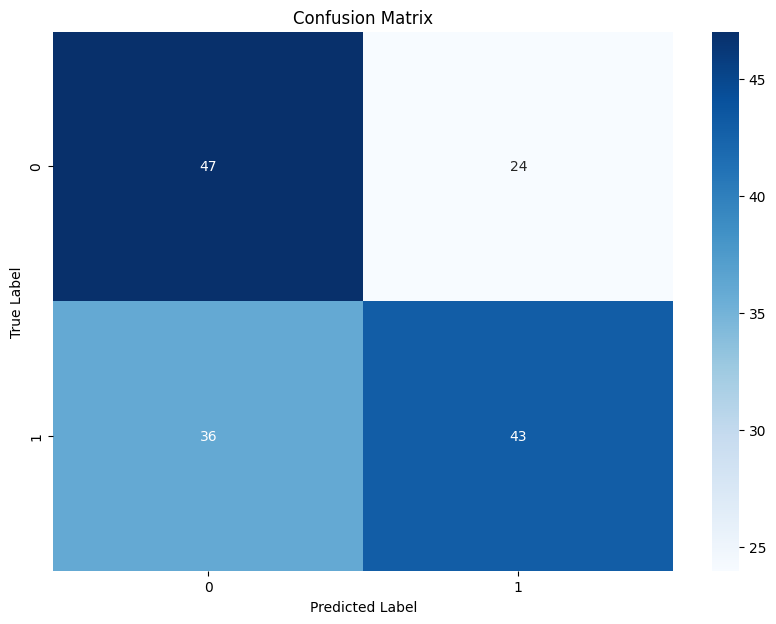

In [442]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the confusion matrix
cm = confusion_matrix(target_unseen, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [443]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


accuracy = accuracy_score(target_unseen, y_pred)

print(f"Model Accuracy on unseen: {accuracy:.4f}")

print(classification_report(target_unseen, y_pred))


Model Accuracy on unseen: 0.6000
              precision    recall  f1-score   support

         0.0       0.57      0.66      0.61        71
         1.0       0.64      0.54      0.59        79

    accuracy                           0.60       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.61      0.60      0.60       150



## The accuracy on unseen data is 60%, it is consistent with the performance of the model
